In [477]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score, precision_score, recall_score,f1_score
from sklearn.metrics import make_scorer, accuracy_score

In [478]:
bank_data = pd.read_csv('bankdata_csv_all.csv')
bank_data.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [479]:
len(bank_data)
#600 records

600

In [480]:
data = bank_data.drop(['id'],axis=1)
data.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [481]:
#Factorization of all columns
data['sex']=pd.Categorical(data['sex'])
data['region']=pd.Categorical(data['region'])
data['married']=pd.Categorical(data['married'])
data['children']=pd.Categorical(data['children'])
data['car']=pd.Categorical(data['car'])
data['save_act']=pd.Categorical(data['save_act'])
data['current_act']=pd.Categorical(data['current_act'])
data['mortgage']=pd.Categorical(data['mortgage'])
data['pep']=pd.Categorical(data['pep'])

#All dtypes are categories
data

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...
595,61,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO
596,30,FEMALE,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO
597,31,FEMALE,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES
598,29,MALE,INNER_CITY,14711.80,YES,0,NO,YES,NO,YES,NO


In [482]:
#One hot encoding to create sparse matrix
data_dummies = pd.get_dummies(data)
list(data_dummies.columns)

['age',
 'income',
 'sex_FEMALE',
 'sex_MALE',
 'region_INNER_CITY',
 'region_RURAL',
 'region_SUBURBAN',
 'region_TOWN',
 'married_NO',
 'married_YES',
 'children_0',
 'children_1',
 'children_2',
 'children_3',
 'car_NO',
 'car_YES',
 'save_act_NO',
 'save_act_YES',
 'current_act_NO',
 'current_act_YES',
 'mortgage_NO',
 'mortgage_YES',
 'pep_NO',
 'pep_YES']

In [483]:
data_dummies.head()

,age,income,sex_FEMALE,sex_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,...,car_NO,car_YES,save_act_NO,save_act_YES,current_act_NO,current_act_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
0,48,17546.0,1,0,1,0,0,0,1,0,...,1,0,1,0,1,0,1,0,0,1
1,40,30085.1,0,1,0,0,0,1,0,1,...,0,1,1,0,0,1,0,1,1,0
2,51,16575.4,1,0,1,0,0,0,0,1,...,0,1,0,1,0,1,1,0,1,0
3,23,20375.4,1,0,0,0,0,1,0,1,...,1,0,1,0,0,1,1,0,1,0
4,57,50576.3,1,0,0,1,0,0,0,1,...,1,0,0,1,1,0,1,0,1,0


In [484]:
data_dummies['pep_YES'].value_counts()

0    326
1    274
Name: pep_YES, dtype: int64

In [485]:
#drop the Pep_yes and Pep_no columns

data_drop = data_dummies.drop(['pep_NO', 'pep_YES'], axis=1)
data_drop.columns

Index(['age', 'income', 'sex_FEMALE', 'sex_MALE', 'region_INNER_CITY',
       'region_RURAL', 'region_SUBURBAN', 'region_TOWN', 'married_NO',
       'married_YES', 'children_0', 'children_1', 'children_2', 'children_3',
       'car_NO', 'car_YES', 'save_act_NO', 'save_act_YES', 'current_act_NO',
       'current_act_YES', 'mortgage_NO', 'mortgage_YES'],
      dtype='object')

In [486]:
#Standard scaling of data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_drop)
X_scaled

array([[ 0.38888715, -0.77416809,  1.        , ..., -1.77142063,
         0.73111343, -0.73111343],
       [-0.16617033,  0.19870631, -1.        , ...,  0.56451866,
        -1.36777681,  1.36777681],
       [ 0.59703371, -0.84947428,  1.        , ...,  0.56451866,
         0.73111343, -0.73111343],
       ...,
       [-0.79061001, -0.89595681,  1.        , ..., -1.77142063,
         0.73111343, -0.73111343],
       [-0.92937438, -0.99406589, -1.        , ..., -1.77142063,
        -1.36777681,  1.36777681],
       [-0.30493471, -0.0661378 , -1.        , ...,  0.56451866,
        -1.36777681,  1.36777681]])

In [487]:
#only centering
data_centered = data_drop - data_drop.mean(axis=0)
data_centered = data_centered.to_numpy()

In [488]:
#minmax scaling
scaler = MinMaxScaler()
data_minmax = scaler.fit_transform(data_drop)
data_minmax = pd.DataFrame(data_minmax, columns=data_drop.columns)
data_minmax = data_minmax.to_numpy()

In [489]:
#try to stretch the data
rng = np.random.RandomState(74)
transformation = rng.normal()


In [490]:
#Define the data as X and y
X=data_drop.to_numpy()
y=data_dummies['pep_YES'].to_numpy()



<AxesSubplot: >

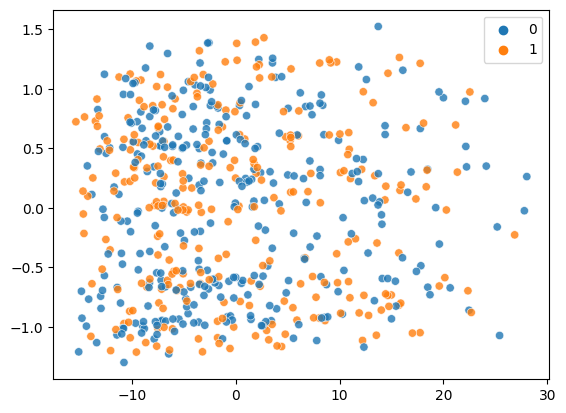

In [491]:
#pca and visualize
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

sns.scatterplot(x=X_pca[:,1],y=X_pca[:,2],hue=y,alpha=0.8)

In [492]:
#kmeans prediction
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [493]:
y

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [494]:
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,

In [495]:
#confusion matrix of clusters 1
data_dummies['clusters1'] = y_pred
data_dummies.clusters1.unique()
data_dummies['clusters1'].value_counts()

0    406
1    194
Name: clusters1, dtype: int64

In [496]:
#confusion matrix of clusters 1
matrix = confusion_matrix(y, data_dummies['clusters1'])
print(matrix)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y, data_dummies['clusters1'])
print('Accuracy: %f' % accuracy)
#precision tp / (tp + fp)
precision = precision_score(y, data_dummies['clusters1'])
print('Precision: %f' % precision)

[[245  81]
 [161 113]]
Accuracy: 0.596667
Precision: 0.582474


In [497]:
#finding elbow with silhoutte score
silhouette_score(X, kmeans.labels_)

0.6174332317823373

In [498]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

In [499]:
#k-modes clustering
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
y_pred = km_cao.fit_predict(X)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 73, cost: 4455.0
Run 1, iteration: 2/100, moves: 0, cost: 4455.0


In [500]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,

In [501]:
data['clusters2'] = y_pred
data

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep,clusters2
0,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES,0
1,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO,1
2,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO,0
3,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO,0
4,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO,1
596,30,FEMALE,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO,0
597,31,FEMALE,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES,0
598,29,MALE,INNER_CITY,14711.80,YES,0,NO,YES,NO,YES,NO,0


In [502]:
#confusion matrix of clusters 2
data_dummies['clusters2'] = y_pred
data_dummies.clusters2.unique()
data_dummies['clusters2'].value_counts()

0    419
1    181
Name: clusters2, dtype: int64

In [503]:
#confusion matrix of clusters 2
matrix = confusion_matrix(y, data_dummies['clusters2'])
print(matrix)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y, data_dummies['clusters2'])
print('Accuracy: %f' % accuracy)
#precision tp / (tp + fp)
precision = precision_score(y, data_dummies['clusters2'])
print('Precision: %f' % precision)

[[240  86]
 [179  95]]
Accuracy: 0.558333
Precision: 0.524862


In [504]:
#finding elbow with silhoutte score
silhouette_score(X, kmeans.labels_)

0.6174332317823373

In [505]:
#huang
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
y_pred = km_huang.fit_predict(X)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 4417.0


In [506]:
#confusion matrix of clusters 2
matrix = confusion_matrix(y, data_dummies['clusters2'])
print(matrix)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y, data_dummies['clusters2'])
print('Accuracy: %f' % accuracy)
#precision tp / (tp + fp)
precision = precision_score(y, data_dummies['clusters2'])
print('Precision: %f' % precision)

[[240  86]
 [179  95]]
Accuracy: 0.558333
Precision: 0.524862


Text(0, 0.5, 'Average Cluster distance')

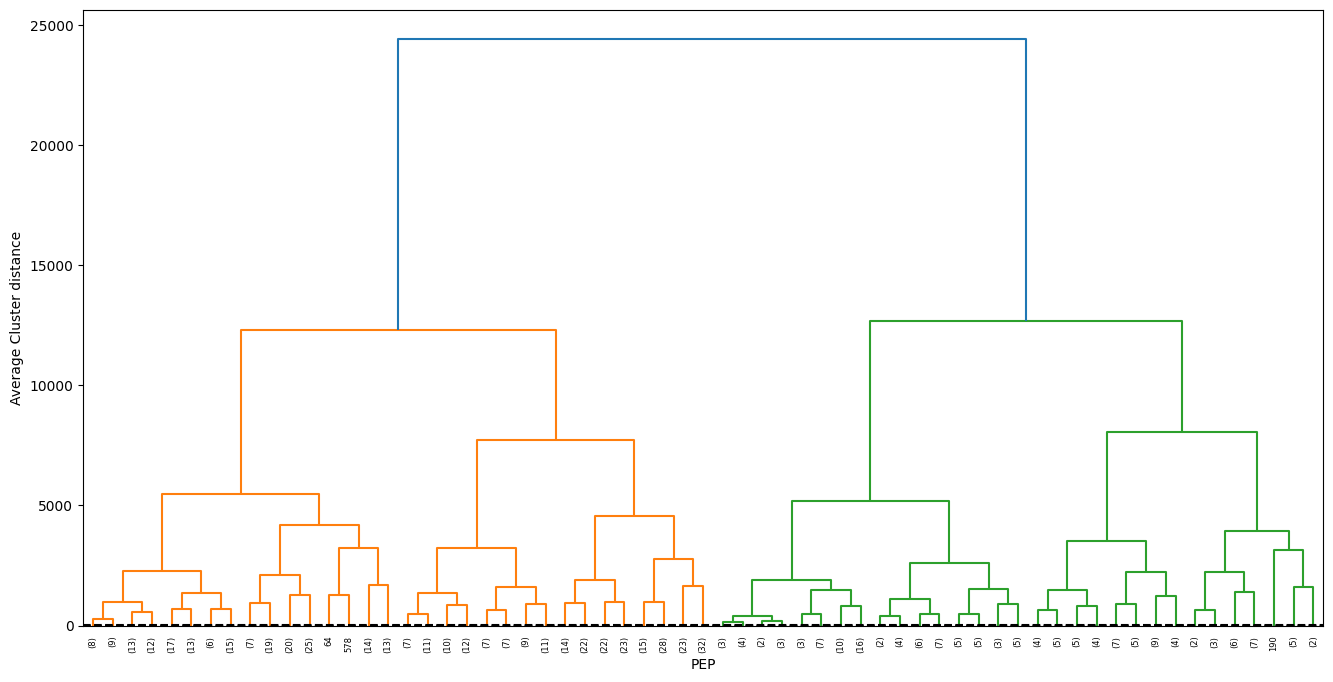

In [507]:
from scipy.cluster.hierarchy import dendrogram, ward
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
linkage_array = linkage(X,method='average',metric='euclidean')
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters


plt.figure(figsize=(16, 8))

dendrogram(linkage_array,truncate_mode="level",p=5)
# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

plt.xlabel("PEP")
plt.ylabel("Average Cluster distance")

In [508]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2)

model = model.fit(X)

model.fit_predict(X)

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,

In [509]:
#confusion matrix of clusters 2
matrix = confusion_matrix(y, data_dummies['clusters2'])
print(matrix)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y, data_dummies['clusters2'])
print('Accuracy: %f' % accuracy)
#precision tp / (tp + fp)
precision = precision_score(y, data_dummies['clusters2'])
print('Precision: %f' % precision)

[[240  86]
 [179  95]]
Accuracy: 0.558333
Precision: 0.524862


In [510]:
#Analysis of Pep_yes=0 and Pep_no =1
pepno = data[data['clusters2']==0]
pepyes = data[data['clusters2']==1]

In [511]:
pepno.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419 entries, 0 to 598
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          419 non-null    int64   
 1   sex          419 non-null    category
 2   region       419 non-null    category
 3   income       419 non-null    float64 
 4   married      419 non-null    category
 5   children     419 non-null    category
 6   car          419 non-null    category
 7   save_act     419 non-null    category
 8   current_act  419 non-null    category
 9   mortgage     419 non-null    category
 10  pep          419 non-null    category
 11  clusters2    419 non-null    uint16  
dtypes: category(9), float64(1), int64(1), uint16(1)
memory usage: 15.6 KB


In [512]:
pepyes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 1 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          181 non-null    int64   
 1   sex          181 non-null    category
 2   region       181 non-null    category
 3   income       181 non-null    float64 
 4   married      181 non-null    category
 5   children     181 non-null    category
 6   car          181 non-null    category
 7   save_act     181 non-null    category
 8   current_act  181 non-null    category
 9   mortgage     181 non-null    category
 10  pep          181 non-null    category
 11  clusters2    181 non-null    uint16  
dtypes: category(9), float64(1), int64(1), uint16(1)
memory usage: 7.4 KB


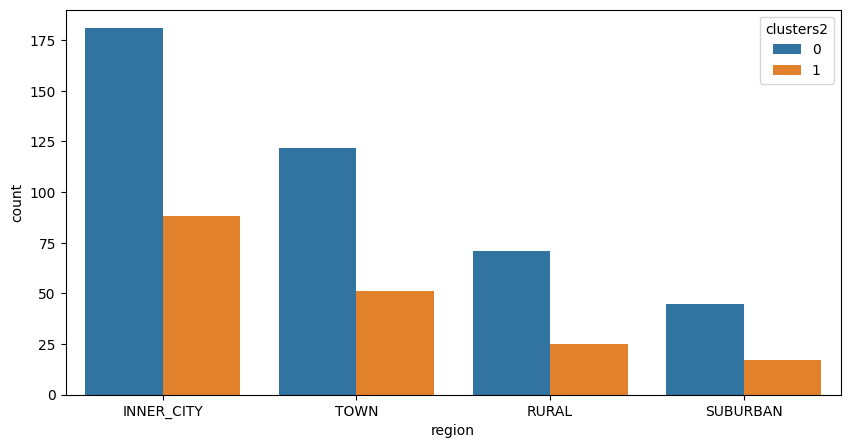

In [513]:
plt.subplots(figsize = (10,5))
sns.countplot(x=data['region'],order=data['region'].value_counts().index,hue=data['clusters2'])
plt.show()

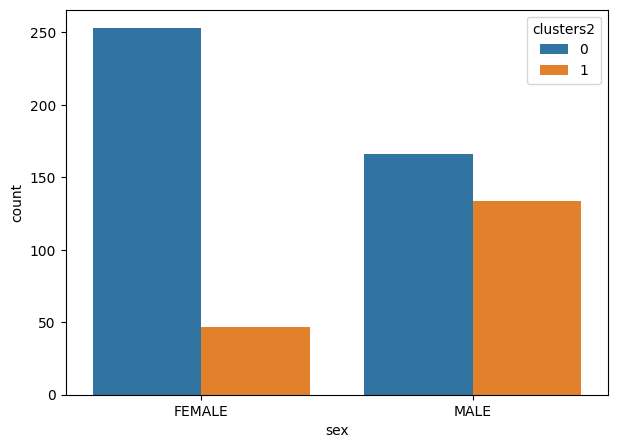

In [514]:
plt.subplots(figsize = (7,5))
sns.countplot(x=data['sex'],order=data['sex'].value_counts().index,hue=data['clusters2'])
plt.show()

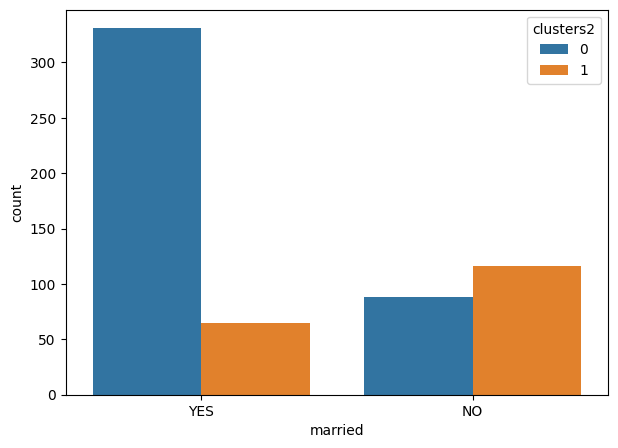

In [515]:
plt.subplots(figsize = (7,5))
sns.countplot(x=data['married'],order=data['married'].value_counts().index,hue=data['clusters2'])
plt.show()

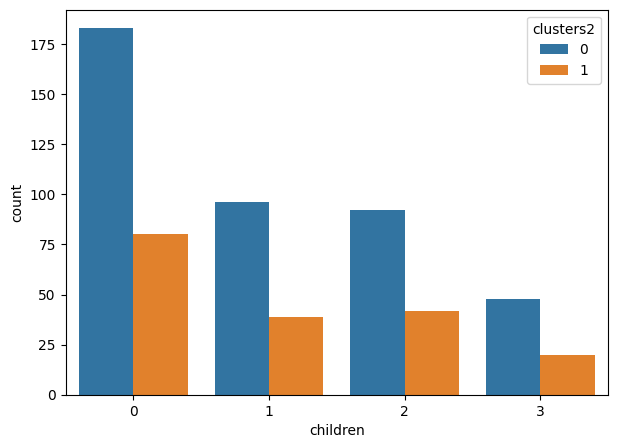

In [516]:
plt.subplots(figsize = (7,5))
sns.countplot(x=data['children'],order=data['children'].value_counts().index,hue=data['clusters2'])
plt.show()

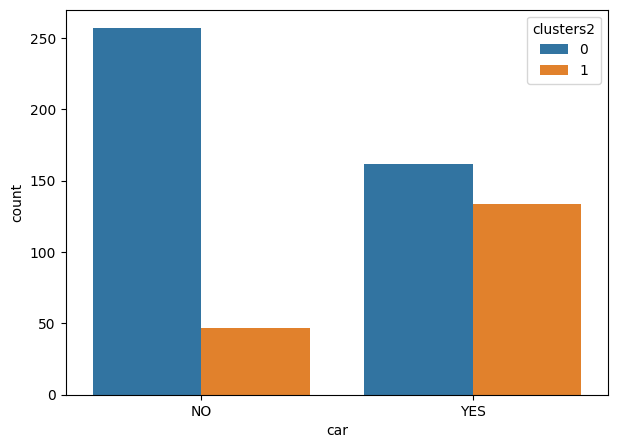

In [517]:
plt.subplots(figsize = (7,5))
sns.countplot(x=data['car'],order=data['car'].value_counts().index,hue=data['clusters2'])
plt.show()

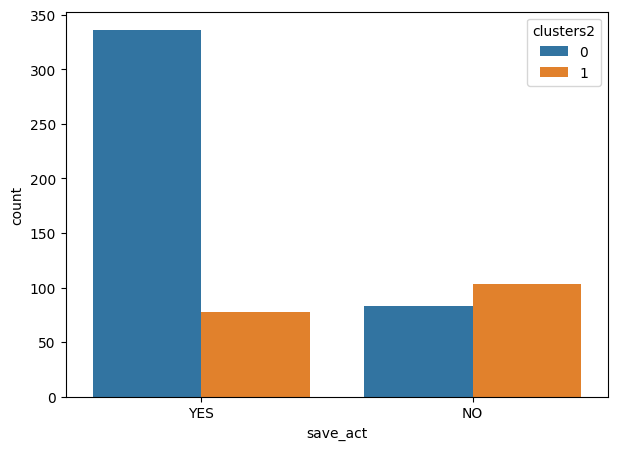

In [518]:
plt.subplots(figsize = (7,5))
sns.countplot(x=data['save_act'],order=data['save_act'].value_counts().index,hue=data['clusters2'])
plt.show()

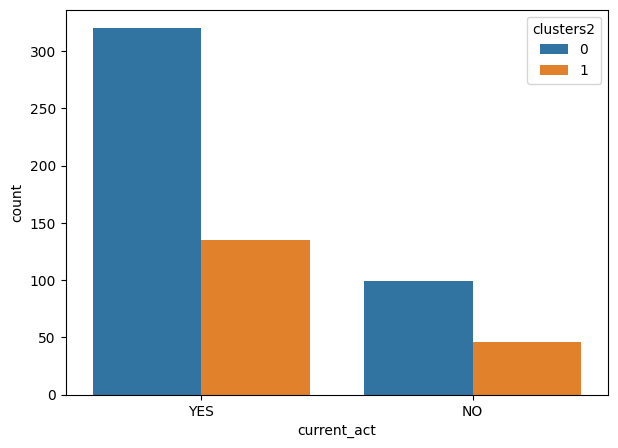

In [519]:
plt.subplots(figsize = (7,5))
sns.countplot(x=data['current_act'],order=data['current_act'].value_counts().index,hue=data['clusters2'])
plt.show()

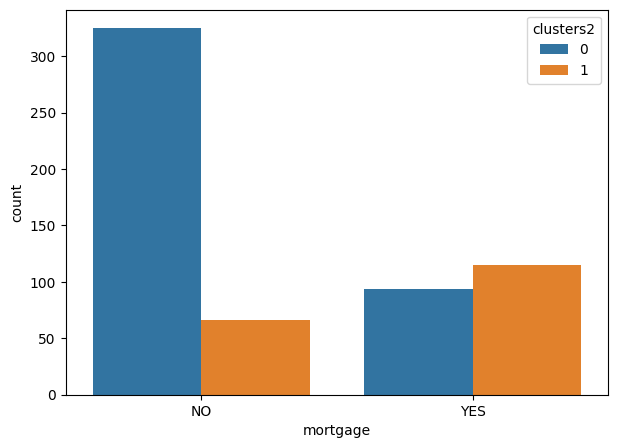

In [520]:
plt.subplots(figsize = (7,5))
sns.countplot(x=data['mortgage'],order=data['mortgage'].value_counts().index,hue=data['clusters2'])
plt.show()

In [521]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
data.head()
data.value_counts()

age  sex  region  income  married  children  car  save_act  current_act  mortgage  pep  clusters2
0    0    0       25      1        0         0    1         1            0         0    0            1
31   0    2       489     1        0         1    0         0            1         0    1            1
     1    0       117     0        0         0    0         1            0         0    1            1
                  165     0        1         1    1         1            1         1    1            1
                  499     0        1         0    1         0            0         1    0            1
                                                                                                    ..
17   0    3       228     1        0         0    1         0            1         0    0            1
                  362     1        0         1    1         1            0         0    0            1
                  396     1        2         0    0         1            0    

In [522]:
X=data.to_numpy()


In [523]:
#Customer segmentation
#identify k with elbow method
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 20)]
inertias = [model.inertia_ for model in kmeans_per_k]

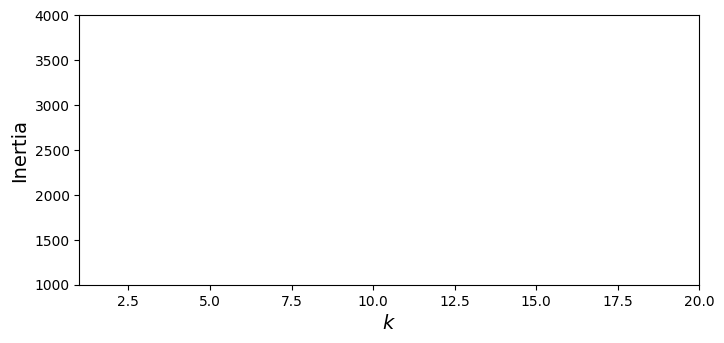

In [524]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 20), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(7, inertias[6]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 20, 1000, 4000])

plt.show()

In [525]:
#performing kmeans using 7 clusters
X=data_drop.to_numpy()
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)


<AxesSubplot: >

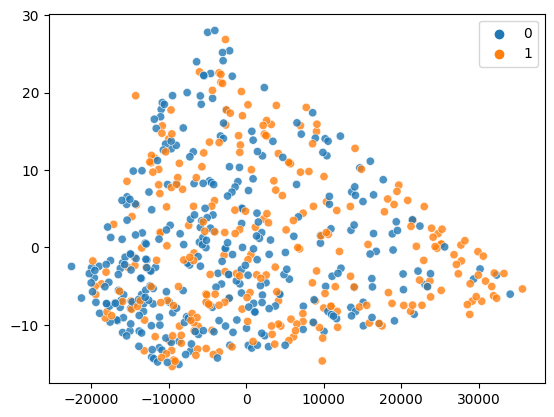

In [526]:
#pca and visualize
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=y,alpha=0.8)

In [527]:
X = data.loc[:,['clusters2']].to_numpy()


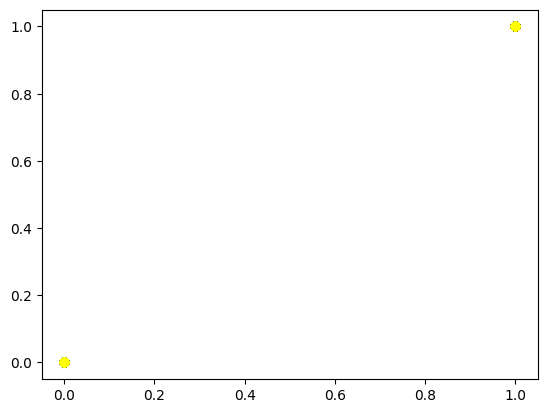

In [528]:

filtered_label0 = X[y_pred==0]
filtered_label1 = X[y_pred == 1]
filtered_label2 = X[y_pred == 2]
filtered_label3 = X[y_pred == 3]
filtered_label4 = X[y_pred == 4]
filtered_label5 = X[y_pred == 5]
filtered_label6 = X[y_pred == 6]


 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,0] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,0] , color = 'pink')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,0] , color = 'green')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,0] , color = 'magenta')
plt.scatter(filtered_label4[:,0] , filtered_label4[:,0] , color = 'blue')
plt.scatter(filtered_label5[:,0] , filtered_label5[:,0] , color = 'cyan')
plt.scatter(filtered_label6[:,0] , filtered_label6[:,0] , color = 'yellow')

plt.show()